In [1]:
cd("$(homedir())/Documents/Repos/enso_project.jl")
using Pkg
Pkg.activate(".")

  Activating project at `C:\Users\lisah\Documents\Repos\enso_project.jl`


In [2]:
using ReservoirComputing, CSV, DataFrames, DynamicalSystems, Plots, enso_project, Statistics

┌ Warning: Package cuDNN not found in current path.
│ - Run `import Pkg; Pkg.add("cuDNN")` to install the cuDNN package, then restart julia.
│ - If cuDNN is not installed, some Flux functionalities will not be available when running on the GPU.
└ @ FluxCUDAExt C:\Users\lisah\.julia\packages\Flux\9PibT\ext\FluxCUDAExt\FluxCUDAExt.jl:10


In [3]:
sst_1D = CSV.read("data/sst_data/sst_34_format.csv", DataFrame)
data_emb, τ = enso_project.tde_with_negative_shift(sst_1D[:, "ANOM_3"])
train_data, val_data, test_data = enso_project.train_val_test_split(data_emb);

Algorithm stopped due to convergence of E₁-statistic. Valid embedding achieved ✓.


In [ ]:
data_1D = sst_1D[:,"ANOM_3"]';

1×517 adjoint(::Vector{Float64}) with eltype Float64:
 0.08  -0.2  -0.14  0.02  0.49  0.65  …  -0.15  -0.28  -0.14  -0.62  -0.71

In [6]:
spectral_radii = [0.8, 0.9, 1.0]
sparsities = [0.05, 0.08, 0.1, 0.2]
input_scales = [0.1, 0.5, 1.0, 2.0]
ridge_values = [0.0, 1e-6, 1e-5]
reservoir_sizes = [90, 120, 135, 140, 160, 180, 200]

param_grid = enso_project.create_param_grid(reservoir_sizes, spectral_radii, sparsities, input_scales, ridge_values);

### example

In [7]:
esn, W_out, val_loss = enso_project.cross_validate_esn(train_data', val_data', param_grid)

enso_project.ESNHyperparams(90, 0.8, 0.05, 0.1, 0.0)
Validation loss = 296.7973848047319
enso_project.ESNHyperparams(120, 0.8, 0.05, 0.1, 0.0)
Validation loss = 264.3639439898855
enso_project.ESNHyperparams(140, 0.9, 0.05, 0.1, 0.0)
Validation loss = 207.54573468954146
enso_project.ESNHyperparams(160, 0.9, 0.05, 0.1, 0.0)
Validation loss = 206.73851832007705
enso_project.ESNHyperparams(135, 1.0, 0.05, 0.1, 0.0)
Validation loss = 192.96938464079673
enso_project.ESNHyperparams(140, 0.8, 0.1, 0.1, 0.0)
Validation loss = 185.3513360691627
enso_project.ESNHyperparams(180, 1.0, 0.1, 0.1, 0.0)
Validation loss = 177.85547091402097
enso_project.ESNHyperparams(120, 1.0, 0.2, 0.1, 0.0)
Validation loss = 170.52433570171104


(ESN(5 => 120), OutputLayer successfully trained with output size: 5, 170.52433570171104)

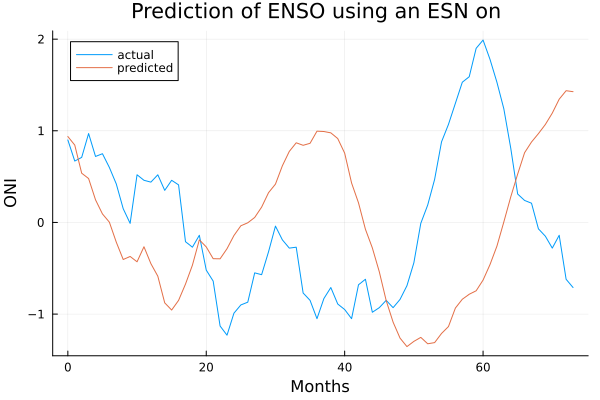

In [9]:
enso_project.plot_esn_prediction(esn, W_out, test_data', "")

### error analysis

In [ ]:
train_size = 300
initial_val_size = 50;

In [ ]:
# sample size N
N = 100

# lead time L
L = 20

30

In [ ]:
predictions_tde, datasets_test_tde = enso_project.sample_lead_times(L,N,data_emb', train_size, initial_val_size,param_grid)

enso_project.ESNHyperparams(90, 0.8, 0.05, 0.1, 0.0)
Validation loss = 78.61038695511563
enso_project.ESNHyperparams(90, 0.9, 0.05, 0.1, 0.0)
Validation loss = 78.59976736112252
enso_project.ESNHyperparams(90, 1.0, 0.05, 0.1, 0.0)
Validation loss = 60.635211049833686
enso_project.ESNHyperparams(135, 0.8, 0.08, 0.1, 0.0)
Validation loss = 28.798071964014255
Finished sample 1
enso_project.ESNHyperparams(90, 0.8, 0.05, 0.1, 0.0)
Validation loss = 83.13792234737164
enso_project.ESNHyperparams(90, 0.9, 0.05, 0.1, 0.0)
Validation loss = 82.92117073665682
enso_project.ESNHyperparams(90, 1.0, 0.05, 0.1, 0.0)
Validation loss = 65.06478282265847
enso_project.ESNHyperparams(135, 0.8, 0.08, 0.1, 0.0)
Validation loss = 31.26725445702917
Finished sample 2


([-1.7025297349577535 -1.9857600199477037 … 175.8278153334907 220.22329835338007; -1.0174270926816613 -0.8205283311237757 … 2.0303336763336373 99.60452705079192], [-0.94 -0.85 … -0.92 -1.21; -0.85 -0.69 … -1.21 -1.31])

In [ ]:
predictions_no_tde, datasets_test_no_tde = enso_project.sample_lead_times(L,N,data_1D, train_size, initial_val_size,param_grid)

In [ ]:

CSV.write("C:/Users/lisah/Documents/Repos/enso_project.jl/temp_saves/error_saves/enso_tde_L$(L)_N$(N)_predictions.csv", DataFrame(predictions_tde, :auto))
CSV.write("C:/Users/lisah/Documents/Repos/enso_project.jl/temp_saves/error_saves/enso_tde_L$(L)_N$(N)_testsets.csv", DataFrame(datasets_test_tde, :auto))

CSV.write("C:/Users/lisah/Documents/Repos/enso_project.jl/temp_saves/error_saves/enso_no_tde_L$(L)_N$(N)_predictions.csv", DataFrame(predictions_no_tde, :auto))
CSV.write("C:/Users/lisah/Documents/Repos/enso_project.jl/temp_saves/error_saves/enso_no_tde_L$(L)_N$(N)_testsets.csv", DataFrame(datasets_test_no_tde, :auto))


"C:/Users/lisah/Documents/Repos/enso_project.jl/temp_saves/error_saves/enso_L30_N100_testsets.csv"

In [ ]:
#predictions = Matrix(CSV.read("C:/Users/lisah/Documents/Repos/enso_project.jl/temp_saves/error_saves/enso_L$(L)_N$(N)_predictions.csv", DataFrame))
#datasets_test = Matrix(CSV.read("C:/Users/lisah/Documents/Repos/enso_project.jl/temp_saves/error_saves/enso_L$(L)_N$(N)_testsets.csv", DataFrame));

In [ ]:
pcc_vals_tde = enso_project.pcc(predictions_tde, datasets_test_tde);
rmse_vals_tde = enso_project.rmse(predictions_tde, datasets_test_tde);
hss_vals_tde = enso_project.hss(predictions_tde, datasets_test_tde);

pcc_vals_no_tde = enso_project.pcc(predictions_no_tde, datasets_test_no_tde);
rmse_vals_no_tde = enso_project.rmse(predictions_no_tde, datasets_test_no_tde);
hss_vals_no_tde = enso_project.hss(predictions_no_tde, datasets_test_no_tde);

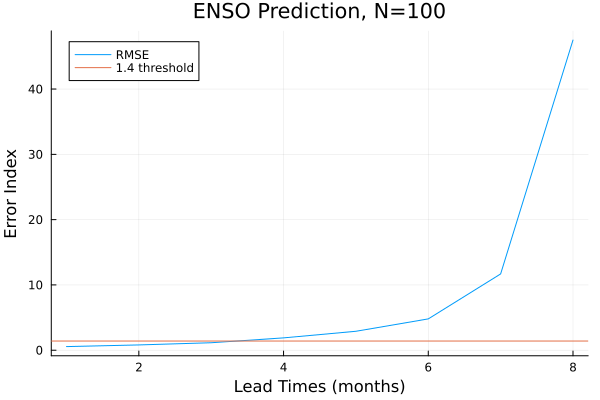

In [ ]:
plot(rmse_vals_tde[1:8], label="RMSE", xlabel="Lead Times (months)", ylabel="Error Index", title="ENSO Prediction with TDE, N=$N")
hline!([1.4], label="1.4 threshold")

In [ ]:
plot(rmse_vals_no_tde[1:8], label="RMSE", xlabel="Lead Times (months)", ylabel="Error Index", title="ENSO Prediction without TDE, N=$N")
hline!([1.4], label="1.4 threshold")

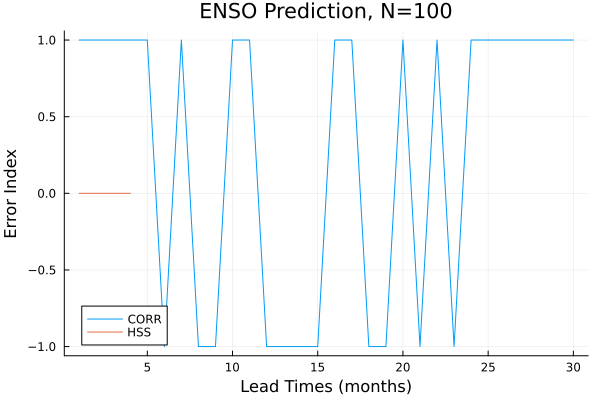

In [ ]:
plot(pcc_vals_tde, label="CORR", xlabel="Lead Times (months)", ylabel="Error Index", title="ENSO Prediction with TDE, N=$N")
plot!(hss_vals_tde, label="HSS")
#savefig("C:/Users/lisah/Documents/Repos/enso_project.jl/temp_saves/fig_saves/enso_error.png")

In [ ]:
plot(pcc_vals_no_tde, label="CORR", xlabel="Lead Times (months)", ylabel="Error Index", title="ENSO Prediction without TDE, N=$N")
plot!(hss_vals_no_tde, label="HSS")